HEART DISEASE PREDICTION USING SVM


In [6]:
import zipfile
import io

# Unzip the uploaded file
with zipfile.ZipFile(io.BytesIO(uploaded['heart+disease (1).zip']), 'r') as zip_ref:
    zip_ref.extractall('.')

SVM Accuracy: 0.8833333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.92      0.90        36
           1       0.87      0.83      0.85        24

    accuracy                           0.88        60
   macro avg       0.88      0.88      0.88        60
weighted avg       0.88      0.88      0.88        60



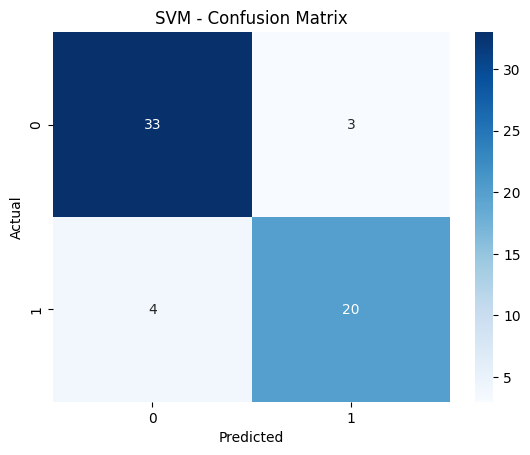


New Patient Prediction: No Heart Disease


In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset (already extracted)
col_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
             'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']
data = pd.read_csv("processed.cleveland.data", header=None, names=col_names)

# Clean data
data = data.replace('?', np.nan).dropna()
data = data.apply(pd.to_numeric)

# Features and target
X = data.drop('target', axis=1)
y = (data['target'] > 0).astype(int)  # Binarize target (0=no disease, 1=disease)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Final model: SVM
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Predictions
y_pred = svm_model.predict(X_test)

# Results
print("SVM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("SVM - Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Create DataFrame for new patient with column names
new_patient_df = pd.DataFrame([[63, 1, 3, 120, 200, 0, 1, 150, 0, 2.3, 3, 0, 6]],
                              columns=X.columns)

# Scale and predict
new_patient_scaled = scaler.transform(new_patient_df)
prediction = svm_model.predict(new_patient_scaled)

print("\nNew Patient Prediction:",
      "Heart Disease" if prediction[0] == 1 else "No Heart Disease")


DIBETES PREDICTION

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

# Load data (same as before)
column_names = ["Pregnancies", "Glucose", "BloodPressure", "SkinThickness",
                "Insulin", "BMI", "DiabetesPedigreeFunction", "Age", "Outcome"]

url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
df = pd.read_csv(url, header=None, names=column_names)

cols_with_zeros = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols_with_zeros:
    df[col] = df[col].replace(0, df[col].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic Regression with Cross-Validation
model = LogisticRegression(max_iter=1000)
cv_scores = cross_val_score(model, X_train_scaled, y_train, cv=5)

print("Cross-validation accuracy scores:", cv_scores)
print("Mean CV accuracy:", cv_scores.mean())

# Train and evaluate on test set
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Cross-validation accuracy scores: [0.74796748 0.81300813 0.7398374  0.73170732 0.77868852]
Mean CV accuracy: 0.7622417699586832
Test accuracy: 0.7662337662337663
Confusion Matrix:
 [[82 17]
 [19 36]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [20]:
pip install shap


SHAP Bar Plot for Class 1 (Diabetes):


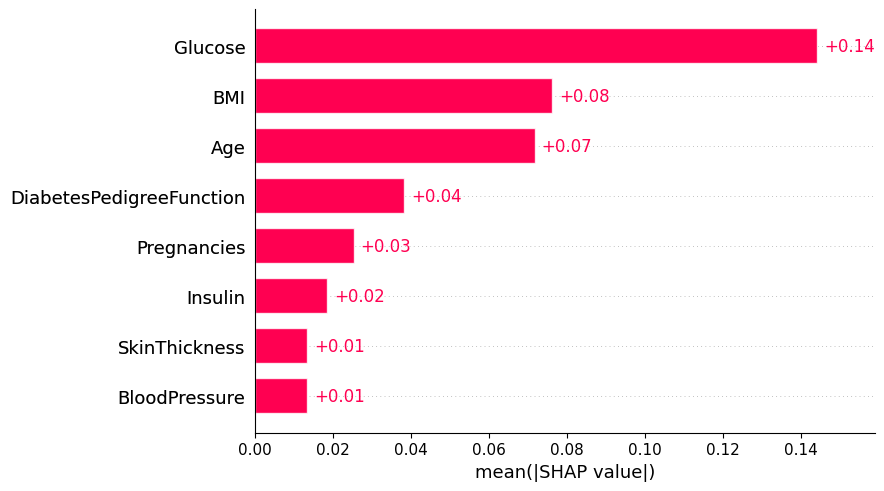


SHAP Beeswarm Plot for Class 1 (Diabetes):


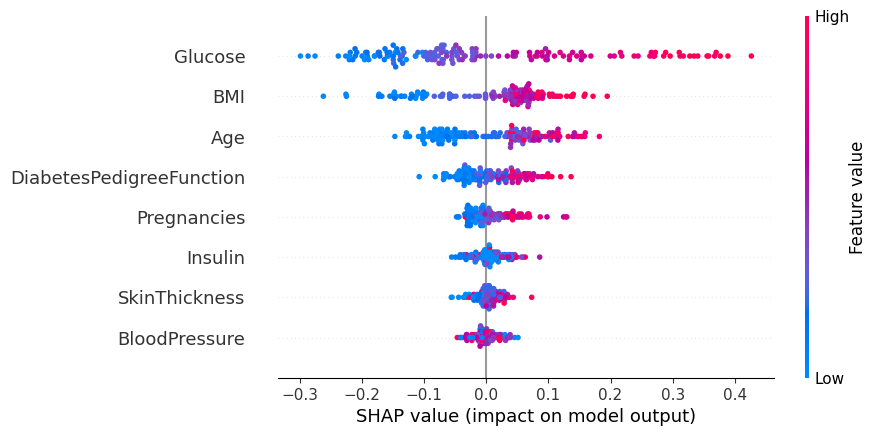


SHAP Force Plot for the first test instance (Class 1):


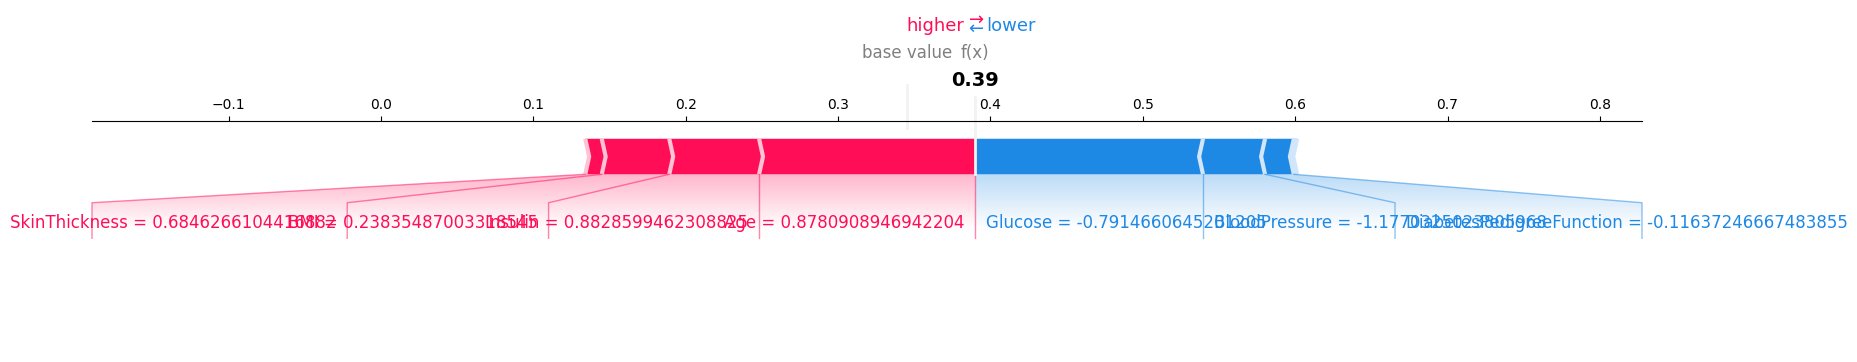

In [26]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Create and train a Random Forest model on the scaled training data
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train_scaled, y_train)

# Convert the scaled test data back to a DataFrame to attach feature names
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Use the modern SHAP Explainer API
explainer = shap.Explainer(best_rf)
shap_values = explainer(X_test_scaled_df)

# --- Generate Plots using the new API ---

# Summary plot (bar): global feature importance for class 1 (Diabetes)
print("SHAP Bar Plot for Class 1 (Diabetes):")
shap.plots.bar(shap_values[:,:,1], show=False)
plt.show()

# Detailed summary plot (beeswarm) for class 1
print("\nSHAP Beeswarm Plot for Class 1 (Diabetes):")
shap.plots.beeswarm(shap_values[:,:,1], show=False)
plt.show()

# Explain single prediction (the first test instance) for class 1
print("\nSHAP Force Plot for the first test instance (Class 1):")
shap.plots.force(shap_values[0,:,1], matplotlib=True, show=False)
plt.show()

Brest cancer


In [27]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load dataset
columns = ['ID', 'Diagnosis'] + [f'feature_{i}' for i in range(1, 31)]
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
df = pd.read_csv(url, header=None, names=columns)
df.drop('ID', axis=1, inplace=True)

# Encode target: M = 1 (Malignant), B = 0 (Benign)
le = LabelEncoder()
df['Diagnosis'] = le.fit_transform(df['Diagnosis'])

# Features and target
X = df.drop('Diagnosis', axis=1)
y = df['Diagnosis']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train logistic regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.9736842105263158
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        71
           1       0.98      0.95      0.96        43

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

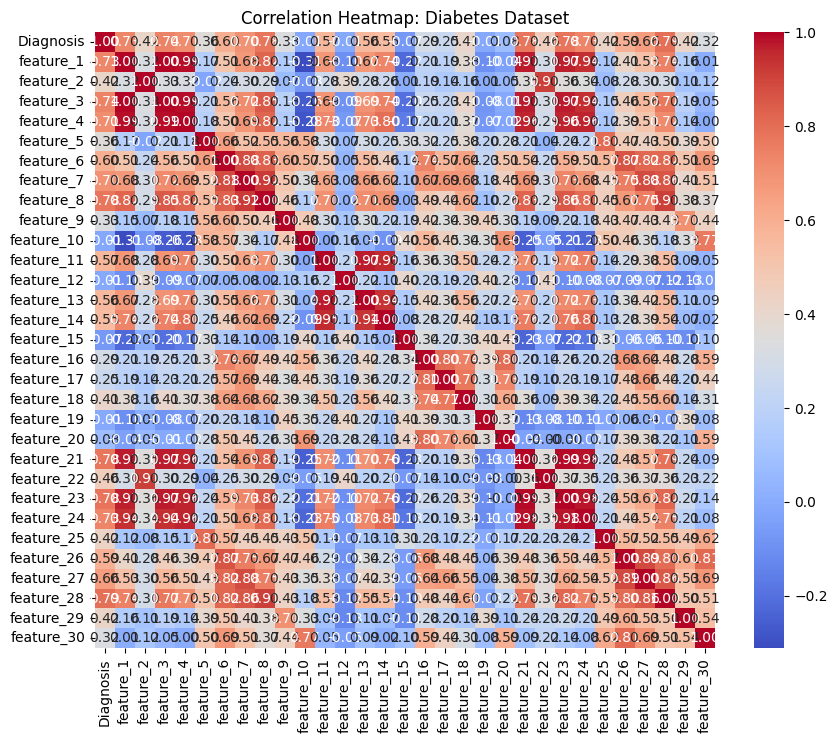

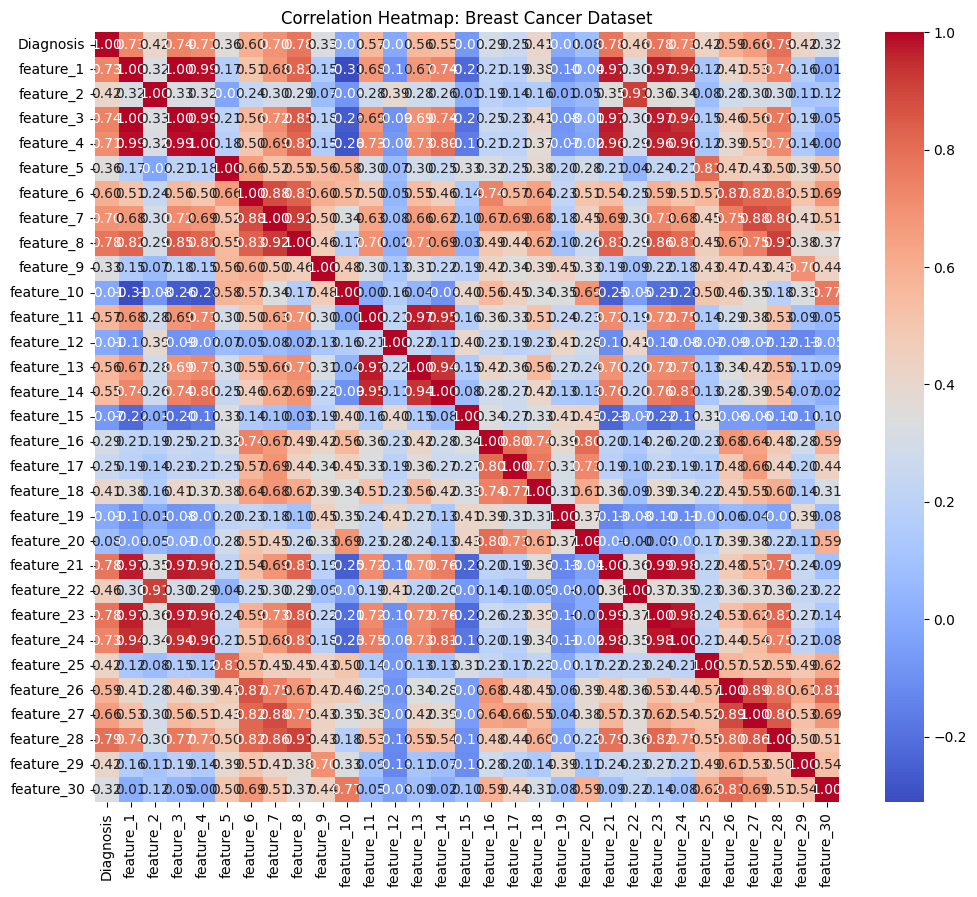

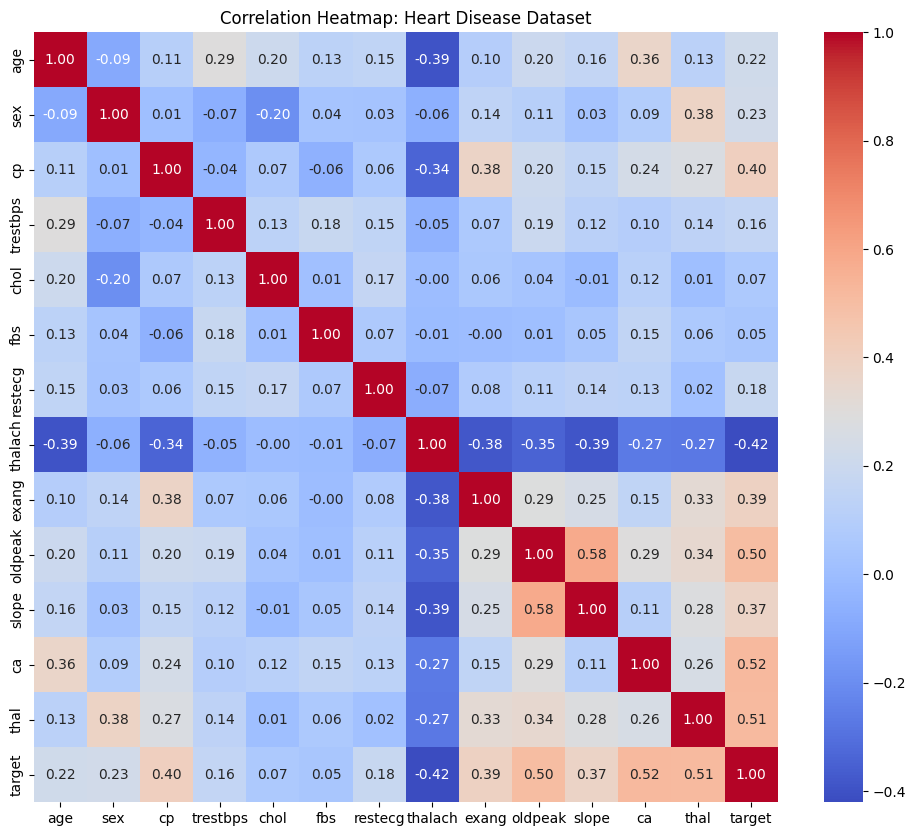

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Rename DataFrames for clarity
df_diabetes = df
df_breast_cancer = df
df_heart = data

# Diabetes correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df_diabetes.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Diabetes Dataset")
plt.show()


# Breast Cancer correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_breast_cancer.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Breast Cancer Dataset")
plt.show()


# Heart Disease correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(df_heart.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap: Heart Disease Dataset")
plt.show()